# Importing Libraries

In [1]:
pip install tensorflow==2.9.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 42.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-serve

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/code/data.zip

Archive:  /content/drive/MyDrive/code/data.zip
   creating: data/
   creating: data/test/
   creating: data/test/abnormal eeg/
  inflating: data/test/abnormal eeg/HB(1).jpg  
  inflating: data/test/abnormal eeg/HB(10).jpg  
  inflating: data/test/abnormal eeg/HB(100).jpg  
  inflating: data/test/abnormal eeg/HB(101).jpg  
  inflating: data/test/abnormal eeg/HB(102).jpg  
  inflating: data/test/abnormal eeg/HB(103).jpg  
  inflating: data/test/abnormal eeg/HB(104).jpg  
  inflating: data/test/abnormal eeg/HB(105).jpg  
  inflating: data/test/abnormal eeg/HB(106).jpg  
  inflating: data/test/abnormal eeg/HB(107).jpg  
  inflating: data/test/abnormal eeg/HB(108).jpg  
  inflating: data/test/abnormal eeg/HB(109).jpg  
  inflating: data/test/abnormal eeg/HB(11).jpg  
  inflating: data/test/abnormal eeg/HB(110).jpg  
  inflating: data/test/abnormal eeg/HB(111).jpg  
  inflating: data/test/abnormal eeg/HB(112).jpg  
  inflating: data/test/abnormal eeg/HB(113).jpg  
  inflating: data/test/abno

---

# Color

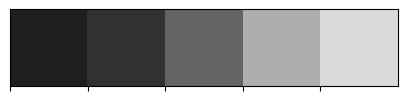

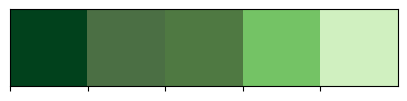

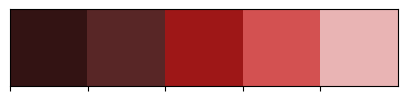

In [4]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

---

# Data Preperation

In [5]:
labels = ['abnormal eeg','normal eeg']

In [6]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('/content/data','train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/data','test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 150/150 [00:02<00:00, 56.36it/s]


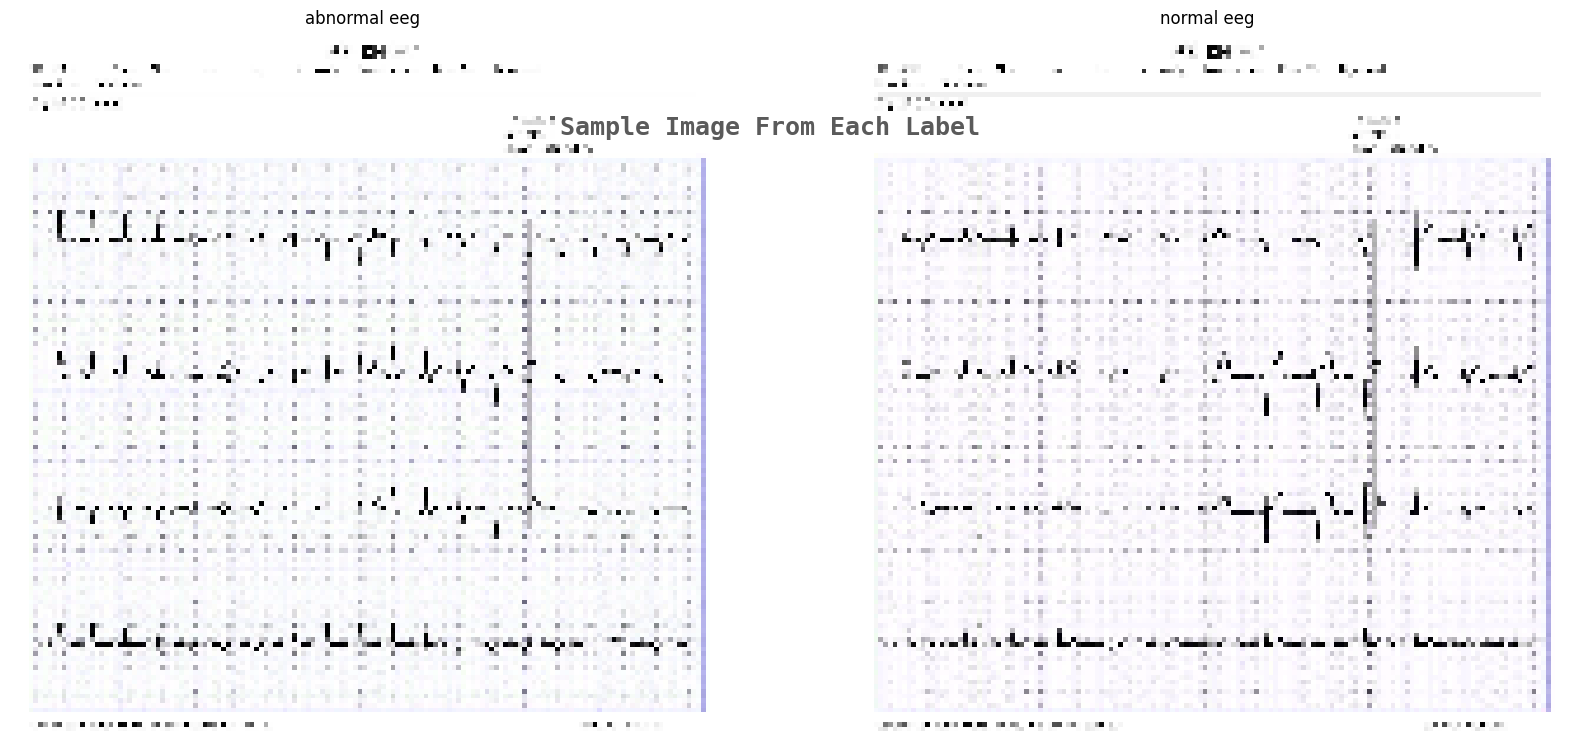

In [7]:
k=0
fig, ax = plt.subplots(1,2,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [8]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [9]:
X_train.shape

(837, 150, 150, 3)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [11]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

---

# Transfer Learning

In [12]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 [==============================] - 0s 0us/step


In [13]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(2,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 150, 150, 3)  0           ['normalization[0][0]']      

In [15]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [16]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

---

# Training The Model

In [18]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
22/22 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9956
Epoch 1: val_accuracy did not improve from 1.00000
22/22 [==============================] - 88s 4s/step - loss: 0.0125 - accuracy: 0.9956 - val_loss: 0.0041 - val_accuracy: 1.0000 - lr: 8.1000e-06
Epoch 2/12
22/22 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9985
Epoch 2: val_accuracy did not improve from 1.00000
22/22 [==============================] - 85s 4s/step - loss: 0.0112 - accuracy: 0.9985 - val_loss: 0.0036 - val_accuracy: 1.0000 - lr: 8.1000e-06
Epoch 3/12
22/22 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9985
Epoch 3: val_accuracy did not improve from 1.00000

Epoch 3: ReduceLROnPlateau reducing learning rate to 2.429999949526973e-06.
22/22 [==============================] - 89s 4s/step - loss: 0.0071 - accuracy: 0.9985 - val_loss: 0.0038 - val_accuracy: 1.0000 - lr: 8.1000e-06
Epoch 4/12
22/22 [==============================] 

In [19]:
from warnings import filterwarnings

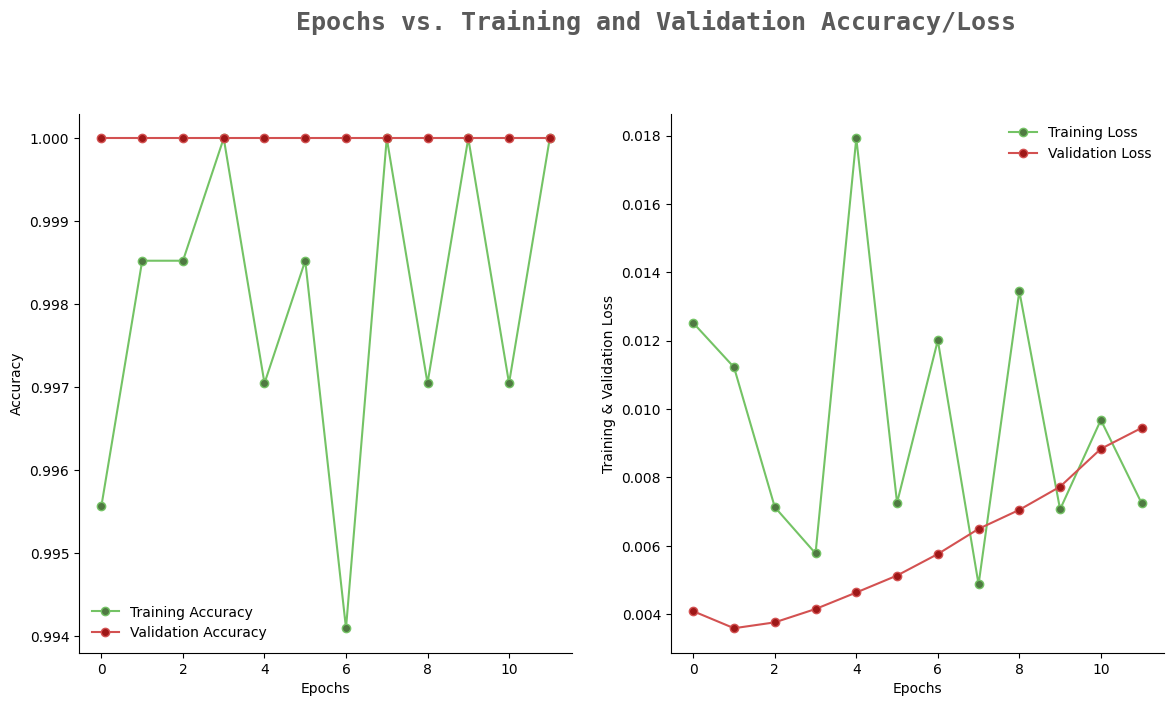

In [20]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

---

# Prediction

In [21]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

3/3 [==============================] - 3s 617ms/step


---

# Evaluation

In [22]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        38

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



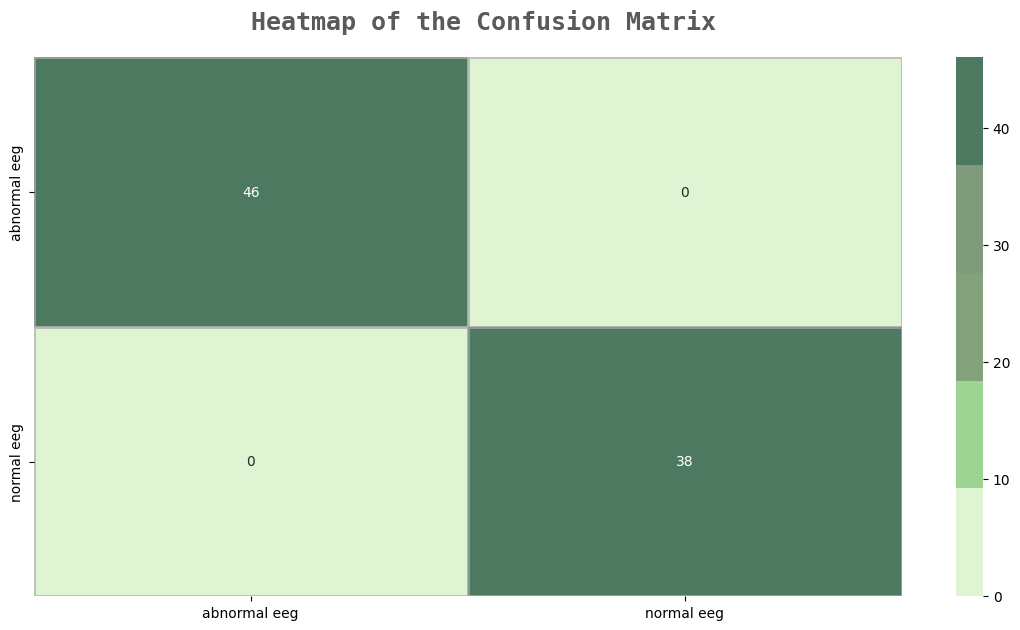

In [23]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

# Bonus Content: Widgets

In [35]:
pip install twilio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.8 MB/s eta 0:00:00


In [40]:
import numpy as np
import cv2
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output
from twilio.rest import Client  # Import Twilio Client

# Twilio credentials (replace with your own details)
TWILIO_ACCOUNT_SID = ''
TWILIO_AUTH_TOKEN = ''
TWILIO_PHONE_NUMBER = ''
TO_PHONE_NUMBER = ''  # The phone number you want to send alerts to

# Initialize Twilio client
client = Client(TWILIO_ACCOUNT_SID, TWILIO_AUTH_TOKEN)

# Load your pre-trained model (update the path to your model)
# model = load_model('your_model_path')  # Make sure to load your model here

def img_pred(upload, bp, temperature, heart_rate):
    # Step 1: Process the EEG image input for prediction
    img = Image.open(io.BytesIO(upload))  # Read image from uploaded bytes content

    # Convert the image to OpenCV format (RGB -> BGR) and resize
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage, (150, 150))  # Resize to match model input
    img = img.reshape(1, 150, 150, 3)  # Reshaping to model input shape

    # Step 2: Make prediction with the model
    p = model.predict(img)
    p = np.argmax(p, axis=1)[0]  # Get the class with the highest probability

    # Set the EEG prediction result
    if p == 0:
        eeg_result = 'Abnormal Eeg'
    elif p == 1:
        eeg_result = 'Normal Eeg'

    # Step 3: Define panic condition thresholds
    panic_thresholds = {
        "high_blood_pressure": 140,   # BP above this is high
        "high_heart_rate": 100,       # Heart rate above this is high
        "low_temperature": 35.0,      # Temperature below this is hypothermic
        "high_temperature": 38.5      # Temperature above this is feverish
    }

    # Initialize medicine recommendation
    medicine_recommendation = ""

    # Step 4: Determine Panic or Not Panic based on EEG and health data
    if eeg_result == 'Normal Eeg':
        # If EEG is normal, automatically set to Not Panic
        panic_status = "Not Panic"
        recommendation = "Stay calm, no immediate concerns."
    else:
        # If EEG is abnormal, check other health thresholds
        panic_conditions = []

        if bp > panic_thresholds["high_blood_pressure"]:
            panic_conditions.append("High blood pressure detected!")
            medicine_recommendation += "For high blood pressure: Consider Arjuna (Terminalia arjuna) tea or Ashwagandha capsules to support heart health.\n"

        if heart_rate > panic_thresholds["high_heart_rate"]:
            panic_conditions.append("High heart rate detected!")
            medicine_recommendation += "For high heart rate: Try Brahmi or Jatamansi herbs, known for their calming effects on the nervous system.\n"

        if temperature < panic_thresholds["low_temperature"]:
            panic_conditions.append("Low body temperature detected!")
            medicine_recommendation += "For low body temperature: Consider warming herbs like ginger or cinnamon tea to improve circulation and body warmth.\n"

        if temperature > panic_thresholds["high_temperature"]:
            panic_conditions.append("High body temperature detected!")
            medicine_recommendation += "For high body temperature (fever): Neem, tulsi (holy basil), or coriander leaf infusions may help to naturally reduce fever.\n"

        # If any condition is exceeded or EEG is abnormal, set to Panic
        if panic_conditions:
            panic_status = "Panic"
            recommendation = "Immediate medical attention recommended!"

            # Send SMS alert to the specified phone number
            send_sms_alert(panic_status, recommendation)

        else:
            panic_status = "Not Panic"
            recommendation = "No immediate concerns, but monitor symptoms."

    # Return panic status, recommendation, and Ayurvedic medicine suggestions
    return panic_status, recommendation, medicine_recommendation


def send_sms_alert(panic_status, recommendation):
    """Function to send SMS alert using Twilio"""
    message = f"Panic Status: {panic_status}\nRecommendation: {recommendation}"

    # Send SMS using Twilio API
    try:
        message_sent = client.messages.create(
            body=message,
            from_=TWILIO_PHONE_NUMBER,  # Twilio phone number
            to=TO_PHONE_NUMBER  # Recipient phone number
        )
        print(f"Alert sent to {TO_PHONE_NUMBER}: {message_sent.sid}")
    except Exception as e:
        print(f"Error sending SMS: {str(e)}")


# File upload widget
uploader = widgets.FileUpload(
    accept='image/*',  # Accept only image files
    multiple=False  # Only one file at a time
)

# Health data input widgets
bp_widget = widgets.IntText(value=150, description='Blood Pressure:', min=0, max=300)
temp_widget = widgets.FloatText(value=39.0, description='Temperature (°C):', min=30.0, max=45.0)
hr_widget = widgets.IntText(value=110, description='Heart Rate (bpm):', min=30, max=200)

# Output widget to display results
out = widgets.Output()

# Button to trigger the prediction
button = widgets.Button(description='Predict')

# Button click handler
def on_button_clicked(_):
    with out:
        clear_output()  # Clear previous output before printing new one
        if uploader.value:  # Ensure a file is uploaded
            # Get the first uploaded file's content
            uploaded_file = list(uploader.value.values())[0]  # This gives the file metadata (content, name, etc.)
            uploaded_image = uploaded_file['content']  # Extract the content (image bytes)

            # Get health data from the widgets
            bp = bp_widget.value
            temperature = temp_widget.value
            heart_rate = hr_widget.value
            try:
                # Call the img_pred function with uploaded image and health data
                panic_status, recommendation, medicine_recommendation = img_pred(uploaded_image, bp, temperature, heart_rate)

                # Display the results only once
                print(f"Panic Status: {panic_status}")
                print(f"Recommendation: {recommendation}")
                if medicine_recommendation:
                    print("Ayurvedic Suggestions:\n" + medicine_recommendation)
            except Exception as e:
                print(f"Error: {str(e)}")
        else:
            print('No Image Uploaded/Invalid Image File')

# Bind the button click event
button.on_click(on_button_clicked)

# Display the widgets
display(uploader, bp_widget, temp_widget, hr_widget, button, out)


FileUpload(value={}, accept='image/*', description='Upload')

IntText(value=150, description='Blood Pressure:')

FloatText(value=39.0, description='Temperature (°C):')

IntText(value=110, description='Heart Rate (bpm):')

Button(description='Predict', style=ButtonStyle())

Output()